<a href="https://colab.research.google.com/github/ParsaRahimzadeh/IML_CHW2/blob/main/Question2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Sajjad Amini</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>

**Student Name**: Parsa Rahimzadeh

**Student ID**: 99108115

# Effect of Overfitting

In this exercise, we want to examine the effect of **overfitting**. As you learned in class, using too many features in training can result in a model with very low loss on the training set but high loss on the validation and test set. For this purpose, we have prepared a dataset in the `q2-train.npy`, `q2-valid.npy`, and `q2-test.npy` files for you. We know that `y` is a polynomial function of `x` in this dataset, meaning that 

$$
y = \sum_{i=0}^{k}a_ix^i
$$

However, we do not know the exact value of `k`.

## Importing Libraries

First, we import the necessary libraries for this assignment. Please note that you should only use these libraries and no other libraries are acceptable.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Reading Data and Preprocessing

In this part of the assignment, you should read data from the `.npy` files. The data in `q2-train.npy` file is your training set and should be stored in the `X_train` and `Y_train` variables. Similarly, the data in `q2-valid.npy` file is your validation set, and the data in `q2-test.npy` file is your test set, which should be stored in `X_val`, `Y_val`, `X_test`, and `Y_test` respectively. You can use the `np.load` function to read the `.npy` files.

In [ ]:
X_train = np.load('q2-train.npy')[:,0]  
X_train = np.array([X_train]).T
Y_train = np.load('q2-train.npy')[:,1]
Y_train = np.array([Y_train]).T
X_val   = np.load('q2-valid.npy')[:,0] 
X_val = np.array([X_val]).T
Y_val   = np.load('q2-valid.npy')[:,1]
Y_val = np.array([Y_val]).T
X_test  = np.load('q2-test.npy')[:,0] 
X_test = np.array([X_test]).T
Y_test  = np.load('q2-test.npy')[:,1]
Y_test = np.array([Y_test]).T
### START CODE HERE ###
print(X_train.shape)
print(X_val.shape)
### END CODE HERE ###

(30, 1)
(40, 1)


To find the best value of `k`, we want to change `k` from 1 to 12 and examine its effect on the validation set, and then choose the right value of `k`. For this purpose, we need to create a matrix with columns equal to $x^0$, $x^1$, $x^2$, ..., $x^k$ for every value of `k`. You can complete the following function to do this job. The function takes an $m \times 1$ vector `X` containing values of input `x` and returns an $m \times (k+1)$ matrix that has the properties mentioned above.

In [ ]:
def create_matrix(X,k):
    new_X = np.hstack(np.power(X,i) for i in range (k+1))
  ### START CODE HERE ###

  ### END CODE HERE ###
    return new_X

## Validate Model

Now, we want to train our model for every value of `k`. You can use any of the methods that we used in **Question 1** (gradient descent or direct calculation) for this purpose. The following function trains our model on the training set for a given value of `k`, and then returns the loss on the training set and validation set, as well as the weight vector `w`.

In [ ]:
# If you need any other function for training write it here
# (like gradient descent or anything else)
#----------------------------------------------
def loss(X, Y, w):
    m, n = X.shape 
  ### START CODE HERE ###
    p = np.matmul(X,w) - Y
    loss = np.matmul(p.T,p)
    loss = loss/m
  ### END CODE HERE ###
    return loss
def direct_method(X, Y):
    ##XT = np.transpose(X)
    ##res = np.linalg.inv(np.matmul(XT,X))
    ##res = np.matmul(res,XT)
    w = np.matmul(np.linalg.pinv(X),Y)
    return w
#----------------------------------------------

In [ ]:
def train(X_train, Y_train, X_val, Y_val, k):
    #w, loss_train, loss_val = None, None
  ### START CODE HERE ###
    X1 = create_matrix(X_train,k)
    w = direct_method(X1, Y_train)
    loss_train = loss(X1, Y_train, w)
    #--------------------------------
    X2 = create_matrix(X_val,k)
    loss_val = loss(X2, Y_val, w)
  ### END CODE HERE ###
    return w, loss_train, loss_val

In the cell below, you can change the value of `k` between 1 and 12 and plot the loss on the training and validation set as a function of `k` in the same plot.

**Question**: Discuss about the effect of $k$.

**Answer**: Increase k model fit better to training data so with increasing k we see overfitting.

<ipython-input-3-fcfd8b77618e>:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  new_X = np.hstack(np.power(X,i) for i in range (k+1))


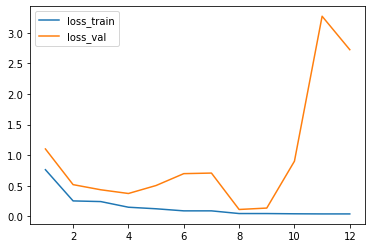

In [ ]:
### START CODE HERE ###
loss_train = np.zeros(12) 
loss_val = np.zeros(12) 
for k in range(12):
    w, loss_train[k], loss_val[k] = train(X_train, Y_train, X_val, Y_val, k+1)
    #print(loss_train[k])
    #print(loss_val[k])
k = [i for i in range(1,13)]
plt.plot(k,loss_train,k,loss_val)
plt.legend(["loss_train", "loss_val"], loc ="upper left")
plt.show()
K = np.where(loss_val==min(loss_val))
K = int(K[0])+1
### END CODE HERE ###

## Evaluating Model

In the cell below find the loss of your best model on the test set.

**Question**: Why we need test set?

**Answer**: To evaluate performance for a separate data set we need test set

In [ ]:
### START CODE HERE ###
w, loss_train, loss_val = train(X_train, Y_train, X_test, Y_test, K)
loss_test = loss(create_matrix(X_test,K),Y_test,w)
print(loss_test)
### END CODE HERE ###

[[0.11791425]]


<ipython-input-3-fcfd8b77618e>:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  new_X = np.hstack(np.power(X,i) for i in range (k+1))
